Étude de cas : speed dating

# Introduction

Les données sont proposées sur Kaggle à l'adresse https://www.kaggle.com/datasets/ulrikthygepedersen/speed-dating avec la préface suivante :

*This data was gathered from participants in experimental speed dating events from 2002-2004. During the events, the attendees would have a four-minute "first date" with every other participant of the opposite sex. At the end of their four minutes, participants were asked if they would like to see their date again. They were also asked to rate their date on six attributes: Attractiveness, Sincerity, Intelligence, Fun, Ambition, and Shared Interests. The dataset also includes questionnaire data gathered from participants at different points in the process. These fields include: demographics, dating habits, self-perception across key attributes, beliefs on what others find valuable in a mate, and lifestyle information.*

*From http://www.stat.columbia.edu/~gelman/arm/examples/speed.dating/*

Ce jeu de données présente plusieurs problèmatiques possibles. On cherchera ici à quantifier dans quelle mesure les différentes préférences exprimées se traduisent par une rencontre à la suite du speed-dating.

# Mise en place

## Import et lecture des données

In [113]:
import matplotlib as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [88]:
file_in='speeddating.csv'
data_ini=pd.read_csv(file_in)
data_ini.shape

(8378, 123)

## Premiers filtrages

Une grande partie des colonnes contient des éléments superflus, sous forme de regroupement des données par classes (par exemple de 0 à 5, de 6 à 8 et de 9 à 10). Ces colonnes commencent par 'd_' et seront supprimées. 
La première colonne est également inutilisée.

On passe ainsi de 123 à 66 colonnes.

In [89]:
cols_i=data_ini.columns
cols=[]
for i in cols_i :
    if i[0:2] != 'd_' :
        cols.append(i)
cols=cols[1:]

data=data_ini[cols]

print(data.shape)

(8378, 66)


In [90]:
data.head()

,wave,gender,age,age_o,race,race_o,samerace,importance_same_race,importance_same_religion,field,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,attractive_o,sinsere_o,intelligence_o,funny_o,ambitous_o,shared_interests_o,attractive_important,sincere_important,intellicence_important,funny_important,ambtition_important,shared_interests_important,attractive,sincere,intelligence,funny,ambition,attractive_partner,sincere_partner,intelligence_partner,funny_partner,ambition_partner,shared_interests_partner,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,interests_correlate,expected_happy_with_sd_people,expected_num_interested_in_me,expected_num_matches,like,guess_prob_liked,met,decision,decision_o,match
0,1.0,b'female',21.0,27.0,b'Asian/Pacific Islander/Asian-American',b'European/Caucasian-American',b'0',2.0,4.0,b'Law',35.0,20.0,20.0,20.0,0.0,5.0,6.0,8.0,8.0,8.0,8.0,6.0,15.0,20.0,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0,6.0,9.0,7.0,7.0,6.0,5.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,0.14,3.0,2.0,4.0,7.0,6.0,0.0,b'1',b'0',b'0'
1,1.0,b'female',21.0,22.0,b'Asian/Pacific Islander/Asian-American',b'European/Caucasian-American',b'0',2.0,4.0,b'Law',60.0,0.0,0.0,40.0,0.0,0.0,7.0,8.0,10.0,7.0,7.0,5.0,15.0,20.0,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0,7.0,8.0,7.0,8.0,5.0,6.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,0.54,3.0,2.0,4.0,7.0,5.0,1.0,b'1',b'0',b'0'
2,1.0,b'female',21.0,22.0,b'Asian/Pacific Islander/Asian-American',b'Asian/Pacific Islander/Asian-American',b'1',2.0,4.0,b'Law',19.0,18.0,19.0,18.0,14.0,12.0,10.0,10.0,10.0,10.0,10.0,10.0,15.0,20.0,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0,5.0,8.0,9.0,8.0,5.0,7.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,0.16,3.0,2.0,4.0,7.0,NaN,1.0,b'1',b'1',b'1'
3,1.0,b'female',21.0,23.0,b'Asian/Pacific Islander/Asian-American',b'European/Caucasian-American',b'0',2.0,4.0,b'Law',30.0,5.0,15.0,40.0,5.0,5.0,7.0,8.0,9.0,8.0,9.0,8.0,15.0,20.0,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0,7.0,6.0,8.0,7.0,6.0,8.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,0.61,3.0,2.0,4.0,7.0,6.0,0.0,b'1',b'1',b'1'
4,1.0,b'female',21.0,24.0,b'Asian/Pacific Islander/Asian-American',b'Latino/Hispanic American',b'0',2.0,4.0,b'Law',30.0,10.0,20.0,10.0,10.0,20.0,8.0,7.0,9.0,6.0,9.0,7.0,15.0,20.0,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0,5.0,6.0,7.0,7.0,6.0,6.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,0.21,3.0,2.0,4.0,6.0,6.0,0.0,b'1',b'1',b'1'


Je vais aussi remplacer les cases avec des b' ', en particulier quand le résultat devient un nombre, et raccourcir les champs trop long, pour faciliter le traitement.

In [69]:
data.replace("b'1'" , 1, inplace=True)
data.replace("b'0'" , 0, inplace=True)

C:\Users\Olivier\AppData\Local\Temp\ipykernel_21236\376774460.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.replace("b'1'" , 1, inplace=True)
C:\Users\Olivier\AppData\Local\Temp\ipykernel_21236\376774460.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.replace("b'0'" , 0, inplace=True)


In [86]:
#à faire plus tard si je traite la partie field
# list_field=np.unique(data.field)
# print(list_field)

In [ ]:
# for i in list_field : 
#     data.replace(list_field[0] , "", inplace=True)

In [82]:
# list_race=np.unique(data.race)

In [81]:
#à faire plus tard si je traite la partie race
# data.replace(list_race[0] , "Other", inplace=True)
#...

# Description des colonnes

In [91]:
print(cols)

['wave', 'gender', 'age', 'age_o', 'race', 'race_o', 'samerace', 'importance_same_race', 'importance_same_religion', 'field', 'pref_o_attractive', 'pref_o_sincere', 'pref_o_intelligence', 'pref_o_funny', 'pref_o_ambitious', 'pref_o_shared_interests', 'attractive_o', 'sinsere_o', 'intelligence_o', 'funny_o', 'ambitous_o', 'shared_interests_o', 'attractive_important', 'sincere_important', 'intellicence_important', 'funny_important', 'ambtition_important', 'shared_interests_important', 'attractive', 'sincere', 'intelligence', 'funny', 'ambition', 'attractive_partner', 'sincere_partner', 'intelligence_partner', 'funny_partner', 'ambition_partner', 'shared_interests_partner', 'sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga', 'interests_correlate', 'expected_happy_with_sd_people', 'expected_num_interested_in_me', 'expected_num_matches', 'like', 'guess_prob_liked', 'met',

In [ ]:
#Mettre des histogrammes , pie charts, etc

# Effet des attributs

In [102]:
index_attr_pref=cols[10:16]
index_attr_o=cols[16:22]

In [103]:
print(index_attr_pref)
print(index_attr_o)

['pref_o_attractive', 'pref_o_sincere', 'pref_o_intelligence', 'pref_o_funny', 'pref_o_ambitious', 'pref_o_shared_interests']
['attractive_o', 'sinsere_o', 'intelligence_o', 'funny_o', 'ambitous_o', 'shared_interests_o']


AttributeError: module 'matplotlib' has no attribute 'show'

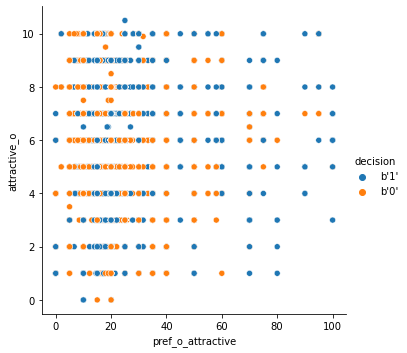

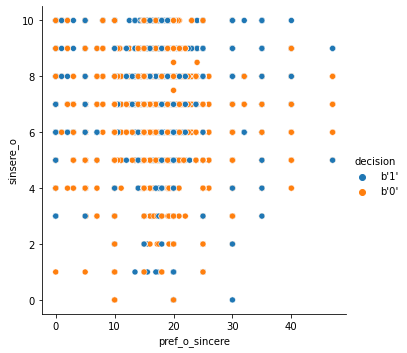

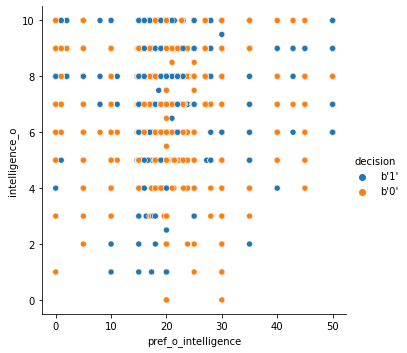

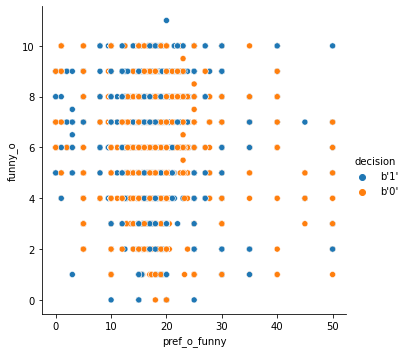

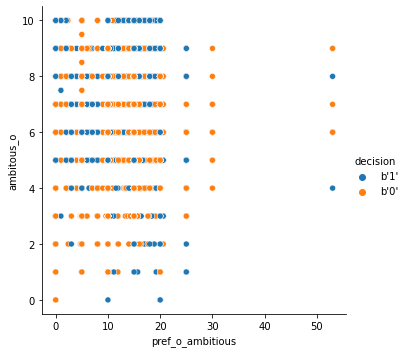

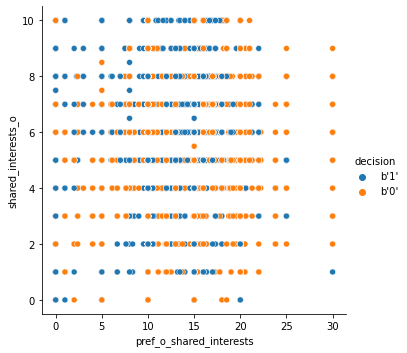

In [115]:
for i in range(6) : 
    foo = sns.relplot(x=index_attr_pref[i], y=index_attr_o[i], data=data, hue="decision")
# i=0
# foo = sns.relplot(x=index_attr_pref[i], y=index_attr_o[i], data=data, hue="decision")
plt.show()

In [110]:
# for i in range(6) : 
#     foo = sns.catplot(x=index_attr_pref[i], y=index_attr_o[i], data=data, hue="like")
i=0
foo = sns.heatmap(x=index_attr_pref[i], y=index_attr_o[i], data=data, hue="like")
plt.show()

ValueError: could not convert string to float: "b'female'"

In [30]:
foo=sns.heatmap(data.loc[:,('decision', 'decision_o')])

ValueError: could not convert string to float: "b'1'"

In [46]:
print(data['interests_correlate'])

0       0.14
1       0.54
2       0.16
3       0.61
4       0.21
        ... 
8373    0.64
8374    0.71
8375   -0.46
8376    0.62
8377    0.01
Name: interests_correlate, Length: 8378, dtype: float64


In [41]:
for i in li :
    print(i[0:2] != 'd_')

True
True
True
True
True
False
False
True
True
True
True
True
False
False
True
True
True
True
True
True
True
False
False
False
False
False
False
True
True
True
True
True
True
False
False
False
False
False
False
True
True
True
True
True
True
False
False
False
False
False
False
True
True
True
True
True
False
False
False
False
False
True
True
True
True
True
True
False
False
False
False
False
False
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
True
True
True
False
False
False
True
True
False
False
True
True
True
True


In [16]:
# pandas.set_option('display.max_columns', 0)
pd.set_option('display.max_columns', None)
data_ini.head()


,has_null,wave,gender,age,age_o,d_age,d_d_age,race,race_o,samerace,importance_same_race,importance_same_religion,d_importance_same_race,d_importance_same_religion,field,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,d_pref_o_attractive,d_pref_o_sincere,d_pref_o_intelligence,d_pref_o_funny,d_pref_o_ambitious,d_pref_o_shared_interests,attractive_o,sinsere_o,intelligence_o,funny_o,ambitous_o,shared_interests_o,d_attractive_o,d_sinsere_o,d_intelligence_o,d_funny_o,d_ambitous_o,d_shared_interests_o,attractive_important,sincere_important,intellicence_important,funny_important,ambtition_important,shared_interests_important,d_attractive_important,d_sincere_important,d_intellicence_important,d_funny_important,d_ambtition_important,d_shared_interests_important,attractive,sincere,intelligence,funny,ambition,d_attractive,d_sincere,d_intelligence,d_funny,d_ambition,attractive_partner,sincere_partner,intelligence_partner,funny_partner,ambition_partner,shared_interests_partner,d_attractive_partner,d_sincere_partner,d_intelligence_partner,d_funny_partner,d_ambition_partner,d_shared_interests_partner,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,d_sports,d_tvsports,d_exercise,d_dining,d_museums,d_art,d_hiking,d_gaming,d_clubbing,d_reading,d_tv,d_theater,d_movies,d_concerts,d_music,d_shopping,d_yoga,interests_correlate,d_interests_correlate,expected_happy_with_sd_people,expected_num_interested_in_me,expected_num_matches,d_expected_happy_with_sd_people,d_expected_num_interested_in_me,d_expected_num_matches,like,guess_prob_liked,d_like,d_guess_prob_liked,met,decision,decision_o,match
0,b'',1.0,b'female',21.0,27.0,6.0,b'[4-6]',b'Asian/Pacific Islander/Asian-American',b'European/Caucasian-American',b'0',2.0,4.0,b'[2-5]',b'[2-5]',b'Law',35.0,20.0,20.0,20.0,0.0,5.0,b'[21-100]',b'[16-20]',b'[16-20]',b'[16-20]',b'[0-15]',b'[0-15]',6.0,8.0,8.0,8.0,8.0,6.0,b'[6-8]',b'[6-8]',b'[6-8]',b'[6-8]',b'[6-8]',b'[6-8]',15.0,20.0,20.0,15.0,15.0,15.0,b'[0-15]',b'[16-20]',b'[16-20]',b'[0-15]',b'[0-15]',b'[0-15]',6.0,8.0,8.0,8.0,7.0,b'[6-8]',b'[6-8]',b'[6-8]',b'[6-8]',b'[6-8]',6.0,9.0,7.0,7.0,6.0,5.0,b'[6-8]',b'[9-10]',b'[6-8]',b'[6-8]',b'[6-8]',b'[0-5]',9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,b'[9-10]',b'[0-5]',b'[6-8]',b'[9-10]',b'[0-5]',b'[0-5]',b'[0-5]',b'[0-5]',b'[0-5]',b'[6-8]',b'[9-10]',b'[0-5]',b'[9-10]',b'[9-10]',b'[9-10]',b'[6-8]',b'[0-5]',0.14,b'[0-0.33]',3.0,2.0,4.0,b'[0-4]',b'[0-3]',b'[3-5]',7.0,6.0,b'[6-8]',b'[5-6]',0.0,b'1',b'0',b'0'
1,b'',1.0,b'female',21.0,22.0,1.0,b'[0-1]',b'Asian/Pacific Islander/Asian-American',b'European/Caucasian-American',b'0',2.0,4.0,b'[2-5]',b'[2-5]',b'Law',60.0,0.0,0.0,40.0,0.0,0.0,b'[21-100]',b'[0-15]',b'[0-15]',b'[21-100]',b'[0-15]',b'[0-15]',7.0,8.0,10.0,7.0,7.0,5.0,b'[6-8]',b'[6-8]',b'[9-10]',b'[6-8]',b'[6-8]',b'[0-5]',15.0,20.0,20.0,15.0,15.0,15.0,b'[0-15]',b'[16-20]',b'[16-20]',b'[0-15]',b'[0-15]',b'[0-15]',6.0,8.0,8.0,8.0,7.0,b'[6-8]',b'[6-8]',b'[6-8]',b'[6-8]',b'[6-8]',7.0,8.0,7.0,8.0,5.0,6.0,b'[6-8]',b'[6-8]',b'[6-8]',b'[6-8]',b'[0-5]',b'[6-8]',9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,b'[9-10]',b'[0-5]',b'[6-8]',b'[9-10]',b'[0-5]',b'[0-5]',b'[0-5]',b'[0-5]',b'[0-5]',b'[6-8]',b'[9-10]',b'[0-5]',b'[9-10]',b'[9-10]',b'[9-10]',b'[6-8]',b'[0-5]',0.54,b'[0.33-1]',3.0,2.0,4.0,b'[0-4]',b'[0-3]',b'[3-5]',7.0,5.0,b'[6-8]',b'[5-6]',1.0,b'1',b'0',b'0'
2,b'',1.0,b'female',21.0,22.0,1.0,b'[0-1]',b'Asian/Pacific Islander/Asian-American',b'Asian/Pacific Islander/Asian-American',b'1',2.0,4.0,b'[2-5]',b'[2-5]',b'Law',19.0,18.0,19.0,18.0,14.0,12.0,b'[16-20]',b'[16-20]',b'[16-20]',b'[16-20]',b'[0-15]',b'[0-15]',10.0,10.0,10.0,10.0,10.0,10.0,b'[9-10]',b'[9-10]',b'[9-10]',b'[9-10]',b'[9-10]',b'[9-10]',15.0,20.0,20.0,15.0,15.0,15.0,b'[0-15]',b'[16-20]',b'[16-20]',b'[0-15]',b'[0-15]',b'[0-15]',6.0,8.0,8.0,8.0,7.0,b'[6-8]',b'[6-8]',b'[6-8]',b'[6-8]',

In [14]:
help(data.head)

Help on method head in module pandas.core.generic:

head(n: 'int' = 5) -> 'NDFrameT' method of pandas.core.frame.DataFrame instance
    Return the first `n` rows.
    
    This function returns the first `n` rows for the object based
    on position. It is useful for quickly testing if your object
    has the right type of data in it.
    
    For negative values of `n`, this function returns all rows except
    the last `n` rows, equivalent to ``df[:-n]``.
    
    Parameters
    ----------
    n : int, default 5
        Number of rows to select.
    
    Returns
    -------
    same type as caller
        The first `n` rows of the caller object.
    
    See Also
    --------
    DataFrame.tail: Returns the last `n` rows.
    
    Examples
    --------
    >>> df = pd.DataFrame({'animal': ['alligator', 'bee', 'falcon', 'lion',
    ...                    'monkey', 'parrot', 'shark', 'whale', 'zebra']})
    >>> df
          animal
    0  alligator
    1        bee
    2     falcon
    

In [4]:
print(data_ini)
print(list(data_ini.columns))

     has_null  wave     gender   age  age_o  d_age   d_d_age  \
0         b''   1.0  b'female'  21.0   27.0    6.0  b'[4-6]'   
1         b''   1.0  b'female'  21.0   22.0    1.0  b'[0-1]'   
2         b''   1.0  b'female'  21.0   22.0    1.0  b'[0-1]'   
3         b''   1.0  b'female'  21.0   23.0    2.0  b'[2-3]'   
4         b''   1.0  b'female'  21.0   24.0    3.0  b'[2-3]'   
...       ...   ...        ...   ...    ...    ...       ...   
8373      b''  21.0    b'male'  25.0   26.0    1.0  b'[0-1]'   
8374      b''  21.0    b'male'  25.0   24.0    1.0  b'[0-1]'   
8375      b''  21.0    b'male'  25.0   29.0    4.0  b'[4-6]'   
8376      b''  21.0    b'male'  25.0   22.0    3.0  b'[2-3]'   
8377      b''  21.0    b'male'  25.0   22.0    3.0  b'[2-3]'   

                                          race  \
0     b'Asian/Pacific Islander/Asian-American'   
1     b'Asian/Pacific Islander/Asian-American'   
2     b'Asian/Pacific Islander/Asian-American'   
3     b'Asian/Pacific Islander/


Types de colonnes : 
- 
- auto-description
- description de l'autre ( _o : other)
- 

On va filtrer les colonnes démarrant par d\_, qui sont des catégories créées après la collecte de résultats, généralement des regroupements de données par intervalles (par exemple 0 à 5, 6 à 8, et 9 à 10).

In [5]:

print((data.values[1:5,:]))

[["b''" 1.0 "b'female'" 21.0 22.0 1.0 "b'[0-1]'"
  "b'Asian/Pacific Islander/Asian-American'"
  "b'European/Caucasian-American'" "b'0'" 2.0 4.0 "b'[2-5]'" "b'[2-5]'"
  "b'Law'" 60.0 0.0 0.0 40.0 0.0 0.0 "b'[21-100]'" "b'[0-15]'"
  "b'[0-15]'" "b'[21-100]'" "b'[0-15]'" "b'[0-15]'" 7.0 8.0 10.0 7.0 7.0
  5.0 "b'[6-8]'" "b'[6-8]'" "b'[9-10]'" "b'[6-8]'" "b'[6-8]'" "b'[0-5]'"
  15.0 20.0 20.0 15.0 15.0 15.0 "b'[0-15]'" "b'[16-20]'" "b'[16-20]'"
  "b'[0-15]'" "b'[0-15]'" "b'[0-15]'" 6.0 8.0 8.0 8.0 7.0 "b'[6-8]'"
  "b'[6-8]'" "b'[6-8]'" "b'[6-8]'" "b'[6-8]'" 7.0 8.0 7.0 8.0 5.0 6.0
  "b'[6-8]'" "b'[6-8]'" "b'[6-8]'" "b'[6-8]'" "b'[0-5]'" "b'[6-8]'" 9.0
  2.0 8.0 9.0 1.0 1.0 5.0 1.0 5.0 6.0 9.0 1.0 10.0 10.0 9.0 8.0 1.0
  "b'[9-10]'" "b'[0-5]'" "b'[6-8]'" "b'[9-10]'" "b'[0-5]'" "b'[0-5]'"
  "b'[0-5]'" "b'[0-5]'" "b'[0-5]'" "b'[6-8]'" "b'[9-10]'" "b'[0-5]'"
  "b'[9-10]'" "b'[9-10]'" "b'[9-10]'" "b'[6-8]'" "b'[0-5]'" 0.54
  "b'[0.33-1]'" 3.0 2.0 4.0 "b'[0-4]'" "b'[0-3]'" "b'[3-5]'" 7.0 5.0
  "

In [6]:
print('')
print(list(data.columns[0:2]))
print('\n')
print('Genre :')
print(list(data.columns[2:3]))
print('\n')
print('Age :')
print(list(data.columns[3:7]))
print('\n')
print('Race :')
print(list(data.columns[7:14]))
print('\n')
print("Domaine d'études :")
print(list(data.columns[14:15]))
print('\n')
print("Attributs :")
print(list(data.columns[15:51]))
print('\n')
print(list(data.columns[51:73]))
print('\n')
print('Intérêt pour activités, ')
print(list(data.columns[73:109]))
print('\n')
print(list(data.columns[109:115]))
print('\n')
print(list(data.columns[115:]))




['has_null', 'wave']


Genre :
['gender']


Age :
['age', 'age_o', 'd_age', 'd_d_age']


Race :
['race', 'race_o', 'samerace', 'importance_same_race', 'importance_same_religion', 'd_importance_same_race', 'd_importance_same_religion']


Domaine d'études :
['field']


Attributs :
['pref_o_attractive', 'pref_o_sincere', 'pref_o_intelligence', 'pref_o_funny', 'pref_o_ambitious', 'pref_o_shared_interests', 'd_pref_o_attractive', 'd_pref_o_sincere', 'd_pref_o_intelligence', 'd_pref_o_funny', 'd_pref_o_ambitious', 'd_pref_o_shared_interests', 'attractive_o', 'sinsere_o', 'intelligence_o', 'funny_o', 'ambitous_o', 'shared_interests_o', 'd_attractive_o', 'd_sinsere_o', 'd_intelligence_o', 'd_funny_o', 'd_ambitous_o', 'd_shared_interests_o', 'attractive_important', 'sincere_important', 'intellicence_important', 'funny_important', 'ambtition_important', 'shared_interests_important', 'd_attractive_important', 'd_sincere_important', 'd_intellicence_important', 'd_funny_important', 'd_ambtition_im

In [9]:
att=['pref_o_attractive', 'd_pref_o_attractive', 'attractive_o', 'd_attractive_o', 'attractive_important', 
 'd_attractive_important','attractive', 'd_attractive', 'attractive_partner', 'd_attractive_partner']
print(data.loc[range(11), att])

    pref_o_attractive d_pref_o_attractive  attractive_o d_attractive_o  \
0               35.00         b'[21-100]'           6.0       b'[6-8]'   
1               60.00         b'[21-100]'           7.0       b'[6-8]'   
2               19.00          b'[16-20]'          10.0      b'[9-10]'   
3               30.00         b'[21-100]'           7.0       b'[6-8]'   
4               30.00         b'[21-100]'           8.0       b'[6-8]'   
5               50.00         b'[21-100]'           7.0       b'[6-8]'   
6               35.00         b'[21-100]'           3.0       b'[0-5]'   
7               33.33         b'[21-100]'           6.0       b'[6-8]'   
8               50.00         b'[21-100]'           7.0       b'[6-8]'   
9              100.00         b'[21-100]'           6.0       b'[6-8]'   
10              35.00         b'[21-100]'           8.0       b'[6-8]'   

    attractive_important d_attractive_important  attractive d_attractive  \
0                   15.0           

In [55]:
print(data.field)

0                    b'Law'
1                    b'Law'
2                    b'Law'
3                    b'Law'
4                    b'Law'
               ...         
8373    b'Climate Dynamics'
8374    b'Climate Dynamics'
8375    b'Climate Dynamics'
8376    b'Climate Dynamics'
8377    b'Climate Dynamics'
Name: field, Length: 8378, dtype: object


In [ ]:
for i in range(10) print(data.loc[range(11), att])